In [2]:
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt
df2 = pd.read_csv("../testdata/10M.nt_1in2_test.gz_org.csv",encoding = "ISO-8859-1", skipinitialspace=True)
print(df[:10])
print(df2[:10])

   set  median     mean   stddev      top1      top5     top10  sampleSize  \
0    0       1   3.1920  18.9995   89.2702   93.6392   95.5884      399037   
1    3       1   1.0000   0.0000  100.0000  100.0000  100.0000         844   
2    4       1  13.3575  82.7788   82.8959   91.5837   93.3937        1105   
3    5       1   9.9612  51.8084   80.9524   88.5714   91.5751        1365   
4    6       1   2.1772  19.4024   96.4401   98.3989   98.8998       11180   
5    7       1   2.3952  26.2014   92.2966   98.3832   98.8646       13916   
6    8       1   4.1511  45.7742   89.4348   96.1245   97.3408        8386   
7    9       1   4.1828  26.3944   87.6447   94.8561   96.3943        6046   
8   10       1   3.6779  22.0753   86.9959   94.0138   96.0456        6398   
9   11       1   3.1022  19.0207   88.0401   94.4636   96.8129        6087   

   #subjects  
0     399037  
1        211  
2        221  
3        227  
4       1597  
5       1739  
6        931  
7        604  
8     

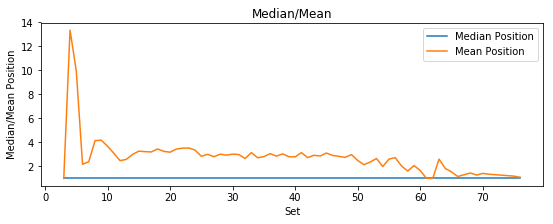

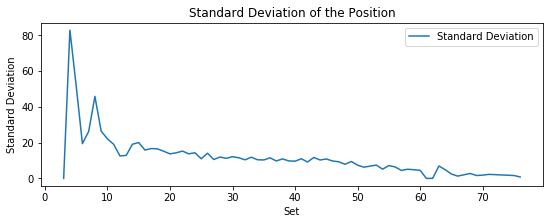

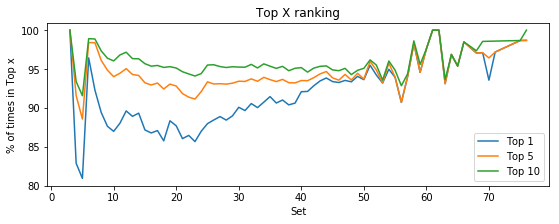

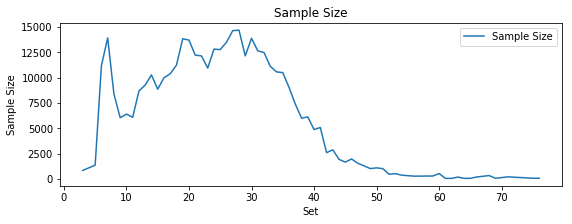

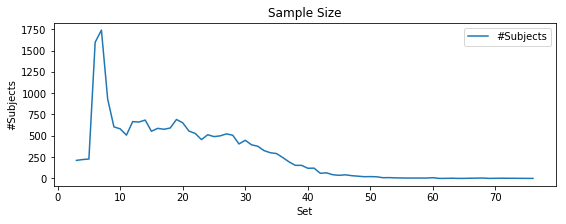

In [3]:
df_detailed = df[df['set'] != 0]
df_overview = df[df['set'] == 0]

#size
plt.rcParams["figure.figsize"] =(9,3)


#median and mean
plt.plot(df_detailed['set'],df_detailed['median'], label="Median Position")
plt.plot(df_detailed['set'],df_detailed['mean'], label="Mean Position")
plt.title("Median/Mean")
plt.xlabel("Set")
plt.ylabel("Median/Mean Position")
plt.legend()
plt.show()

#standard deviation
plt.plot(df_detailed['set'],df_detailed['stddev'], label="Standard Deviation")
plt.title("Standard Deviation of the Position")
plt.xlabel("Set")
plt.ylabel("Standard Deviation")
plt.legend()
plt.show()

#topX
plt.plot(df_detailed['set'],df_detailed['top1'], label="Top 1")
plt.plot(df_detailed['set'],df_detailed['top5'], label="Top 5")
plt.plot(df_detailed['set'],df_detailed['top10'], label="Top 10")
plt.title("Top X ranking")
plt.xlabel("Set")
plt.ylabel("% of times in Top x")
plt.legend()
plt.show()

#sample size 
plt.plot(df_detailed['set'],df_detailed['sampleSize'], label="Sample Size")
plt.title("Sample Size")
plt.xlabel("Set")
plt.ylabel("Sample Size")
plt.legend()
plt.show()

#subject 
plt.plot(df_detailed['set'],df_detailed['#subjects'], label="#Subjects")
plt.title("Sample Size")
plt.xlabel("Set")
plt.ylabel("#Subjects")
plt.legend()
plt.show()

Detailed look on [0,20]

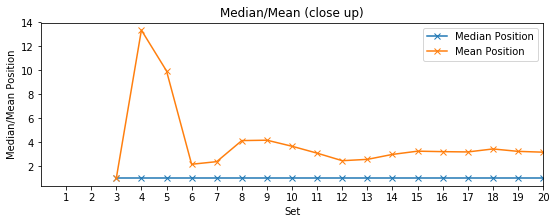

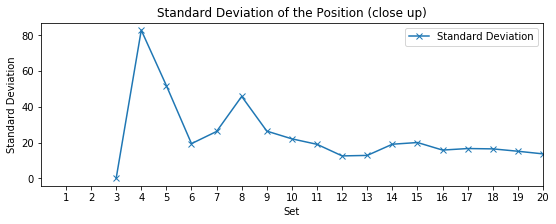

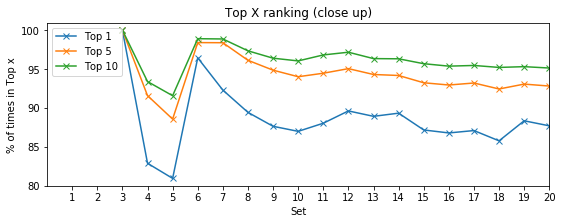

In [4]:
#median and mean
plt.rcParams["figure.figsize"] =(9,3)

plt.plot(df_detailed['set'],df_detailed['median'], label="Median Position", marker='x')
plt.plot(df_detailed['set'],df_detailed['mean'], label="Mean Position", marker='x')
plt.title("Median/Mean (close up)")
plt.xlabel("Set")
plt.ylabel("Median/Mean Position")
plt.xlim((0, 20))
plt.xticks(np.arange(1, 21, 1.0))
plt.legend()
plt.show()

#standard deviation
plt.plot(df_detailed['set'],df_detailed['stddev'], label="Standard Deviation", marker='x')
plt.title("Standard Deviation of the Position (close up)")
plt.xlabel("Set")
plt.ylabel("Standard Deviation")
plt.xlim((0, 20))
plt.xticks(np.arange(1, 21, 1.0))
plt.legend()
plt.show()

#topX
plt.plot(df_detailed['set'],df_detailed['top1'], label="Top 1", marker='x')
plt.plot(df_detailed['set'],df_detailed['top5'], label="Top 5", marker='x')
plt.plot(df_detailed['set'],df_detailed['top10'], label="Top 10", marker='x')
plt.xlim((0, 20))
plt.xticks(np.arange(1, 21, 1.0))
plt.title("Top X ranking (close up)")
plt.xlabel("Set")
plt.ylabel("% of times in Top x")
plt.legend()
plt.show()

Compare 3 different files (Adapt paths!)

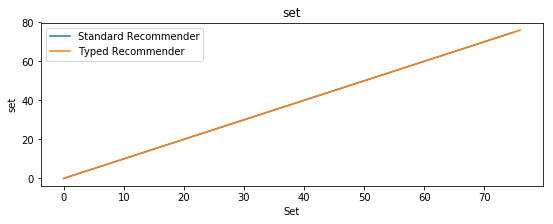

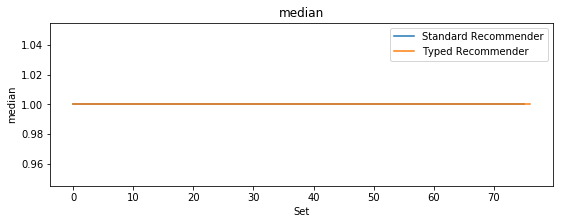

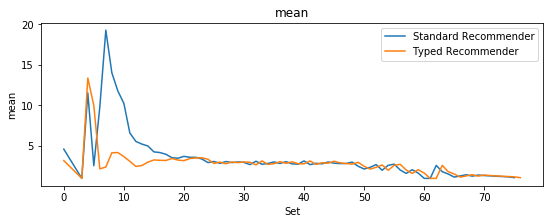

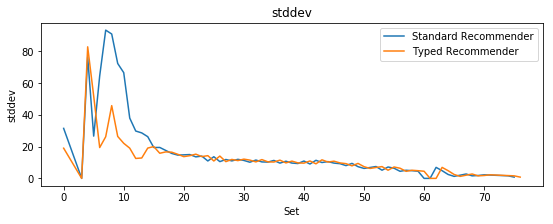

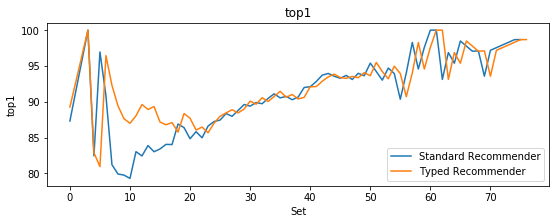

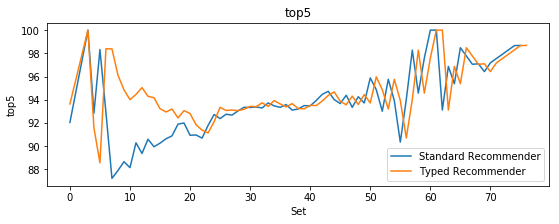

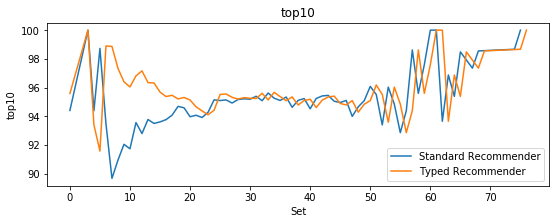

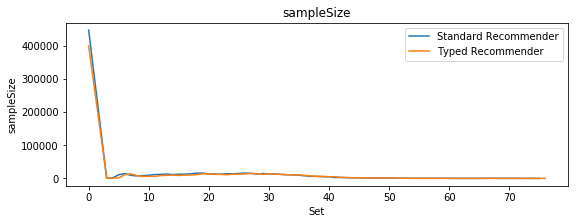

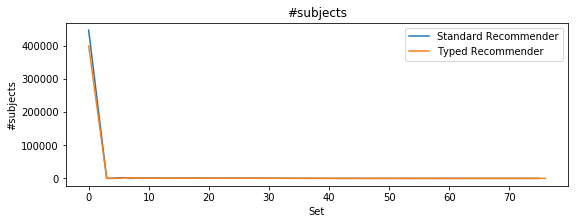

In [6]:

df_recommender = pd.read_csv("../testdata/10M.nt_1in2_test.gz_org.csv",encoding = "ISO-8859-1", skipinitialspace=True)
df_types = pd.read_csv("../testdata/10M.nt_1in2_test.gz.csv",encoding = "ISO-8859-1", skipinitialspace=True)
#df_types_and_backoff = pd.read_csv("../testdata/10M.nt_1in2_test.gz_org.csv",encoding = "ISO-8859-1", skipinitialspace=True)

for column in df_recommender:
    #standard deviation
    plt.plot(df_recommender['set'],df_recommender[column], label="Standard Recommender")
    plt.plot(df_types['set'],df_types[column], label="Typed Recommender")
    #plt.plot(df_detailed['set'],df_detailed[column], label="Typed + Backoffed Recommender")
    plt.title(column)
    plt.xlabel("Set")
    plt.ylabel(column)
    plt.legend()
    plt.show()



